In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train=pd.read_excel('Doctor_Final_Train.xlsx')
data_test=pd.read_excel('Doctor_Final_Test.xlsx')

In [3]:
data=pd.concat([data_train, data_test], ignore_index=True)
data

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...,...
7943,Test,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
7944,Test,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
7945,Test,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
7946,Test,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


In [4]:
data.dtypes

Dataset                object
Experience             object
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
dtype: object

In [5]:
data.isnull().sum()

Dataset                  0
Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

In [6]:
# Converting values in the experience column into integers
data['Experience']=data['Experience'].str.strip('years of experience')

In [7]:
data['Experience']=data['Experience'].astype(int)

In [8]:
data.dtypes

Dataset                object
Experience              int32
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
dtype: object

In [9]:
# Miscelleneous info column includes information which is random in nature and do not influence the doctors' fees
data.drop(columns=['Miscellaneous_Info'], inplace=True)

In [10]:
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98%


In [11]:
# Converting values in the rating column into integers
data['Rating']=data['Rating'].str.strip('%')

In [12]:
data['Rating'].fillna(0, inplace=True)
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100
...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98


In [13]:
data['Rating']=data['Rating'].astype(int)

In [14]:
data.isnull().sum()

Dataset             0
Experience          0
Fees             1987
Place              31
Profile             0
Qualification       0
Rating              0
dtype: int64

In [15]:
# Filling the missing values in Place column
data['Place'].fillna(data['Place'].mode()[0], inplace=True)
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100
...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98


In [16]:
data.isnull().sum()

Dataset             0
Experience          0
Fees             1987
Place               0
Profile             0
Qualification       0
Rating              0
dtype: int64

In [17]:
# Checking the maximum length of string values to separate values in different columns
max_qual_length=-1
for i in range(len(data['Place'])):
    temp=len(data['Place'].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print('Max length is :{}'.format(max_qual_length))

Max length is :3


In [18]:
p1=list()
p2=list()
p3=list()
for i in range(len(data['Place'])):
    temp=data['Place'].iloc[i].split(',')
    try :
        p1.append(temp[0].strip().upper())
    except :
        p1.append('None')
    try :
        p2.append(temp[1].strip().upper())
    except :
        p2.append('None')
    try :
        p3.append(temp[2].strip().upper())
    except :
        p3.append('None')

In [19]:
data['p1']=p1
data['p2']=p2
data['p3']=p3

In [20]:
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2,p3
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,KAKKANAD,ERNAKULAM,None
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,WHITEFIELD,BANGALORE,None
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,MATHIKERE - BEL,BANGALORE,None
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,BANNERGHATTA ROAD,BANGALORE,None
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100,KEELKATTALAI,CHENNAI,None
...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0,BASAVANAGUDI,BANGALORE,None
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0,CHOOLAI,CHENNAI,None
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0,PORUR,CHENNAI,None
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98,AREKERE,BANGALORE,None


In [21]:
data.loc[data['p3']!="None"]

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2,p3
2169,Train,11,250.0,"Dwarka, Sector 5, Delhi",Dentist,BDS,0,DWARKA,SECTOR 5,DELHI


In [22]:
data.loc[data['p3']!='None', ['p2']] = data[['p3']]
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2,p3
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,KAKKANAD,ERNAKULAM,None
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,WHITEFIELD,BANGALORE,None
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,MATHIKERE - BEL,BANGALORE,None
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,BANNERGHATTA ROAD,BANGALORE,None
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100,KEELKATTALAI,CHENNAI,None
...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0,BASAVANAGUDI,BANGALORE,None
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0,CHOOLAI,CHENNAI,None
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0,PORUR,CHENNAI,None
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98,AREKERE,BANGALORE,None


In [23]:
data.loc[data['p2']=='None']

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2,p3
3980,Train,23,250.0,e,Dentist,BDS,0,E,None,None


In [24]:
data['p2'].fillna('DELHI', inplace = True)

In [25]:
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2,p3
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,KAKKANAD,ERNAKULAM,None
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,WHITEFIELD,BANGALORE,None
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,MATHIKERE - BEL,BANGALORE,None
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,BANNERGHATTA ROAD,BANGALORE,None
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100,KEELKATTALAI,CHENNAI,None
...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0,BASAVANAGUDI,BANGALORE,None
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0,CHOOLAI,CHENNAI,None
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0,PORUR,CHENNAI,None
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98,AREKERE,BANGALORE,None


In [26]:
data.drop(columns=['p3'], inplace=True)

In [27]:
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,KAKKANAD,ERNAKULAM
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,WHITEFIELD,BANGALORE
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,MATHIKERE - BEL,BANGALORE
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,BANNERGHATTA ROAD,BANGALORE
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100,KEELKATTALAI,CHENNAI
...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0,BASAVANAGUDI,BANGALORE
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0,CHOOLAI,CHENNAI
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0,PORUR,CHENNAI
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98,AREKERE,BANGALORE


In [28]:
# Separating the string values in 'Qualification' column
# Checking the maximum length of string values to separate values in different columns
max_qual_length=-1
for i in range(len(data['Qualification'])):
    temp=len(data['Qualification'].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print('Max length is :{}'.format(max_qual_length))

Max length is :17


In [29]:
q1=list()
q2=list()
q3=list()
q4=list()
q5=list()
q6=list()
q7=list()
q8=list()
q9=list()
q10=list()
q11=list()
q12=list()
q13=list()
q14=list()
q15=list()
q16=list()
q17=list()
for i in range(len(data['Qualification'])):
    temp=data['Qualification'].iloc[i].split(',')
    try :
        q1.append(temp[0].strip().upper())
    except :
        q1.append('None')
    try :
        q2.append(temp[1].strip().upper())
    except :
        q2.append('None')
    try :
        q3.append(temp[2].strip().upper())
    except :
        q3.append('None')
    try :
        q4.append(temp[3].strip().upper())
    except :
        q4.append('None')
    try :
        q5.append(temp[4].strip().upper())
    except :
        q5.append('None')
    try :
        q6.append(temp[5].strip().upper())
    except :
        q6.append('None')
    try :
        q7.append(temp[6].strip().upper())
    except :
        q7.append('None')
    try :
        q8.append(temp[7].strip().upper())
    except :
        q8.append('None')
    try :
        q9.append(temp[8].strip().upper())
    except :
        q9.append('None')
    try :
        q10.append(temp[9].strip().upper())
    except :
        q10.append('None')
    try :
        q11.append(temp[10].strip().upper())
    except :
        q11.append('None')
    try :
        q12.append(temp[11].strip().upper())
    except :
        q12.append('None')
    try :
        q13.append(temp[12].strip().upper())
    except :
        q13.append('None')
    try :
        q14.append(temp[13].strip().upper())
    except :
        q14.append('None')
    try :
        q15.append(temp[14].strip().upper())
    except :
        q15.append('None')
    try :
        q16.append(temp[15].strip().upper())
    except :
        q16.append('None')
    try :
        q17.append(temp[16].strip().upper())
    except :
        q17.append('None')

In [30]:
data["q1"]=q1
data["q2"]=q2
data["q3"]=q3
data["q4"]=q4
data["q5"]=q5
data["q6"]=q6
data["q7"]=q7
data["q8"]=q8
data["q9"]=q9
data["q10"]=q10
data["q11"]=q11
data["q12"]=q12
data["q13"]=q13
data["q14"]=q14
data["q15"]=q15
data["q16"]=q16
data["q17"]=q17

In [31]:
data

,Dataset,Experience,Fees,Place,Profile,Qualification,Rating,p1,p2,q1,...,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,Train,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,KAKKANAD,ERNAKULAM,BHMS,...,None,None,None,None,None,None,None,None,None,None
1,Train,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,WHITEFIELD,BANGALORE,BAMS,...,None,None,None,None,None,None,None,None,None,None
2,Train,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,MATHIKERE - BEL,BANGALORE,MBBS,...,None,None,None,None,None,None,None,None,None,None
3,Train,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,BANNERGHATTA ROAD,BANGALORE,BSC - ZOOLOGY,...,None,None,None,None,None,None,None,None,None,None
4,Train,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100,KEELKATTALAI,CHENNAI,BAMS,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0,BASAVANAGUDI,BANGALORE,BAMS,...,None,None,None,None,None,None,None,None,None,None
7944,Test,4,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0,CHOOLAI,CHENNAI,MD - DERMATOLOGY,...,None,None,None,None,None,None,None,None,None,None
7945,Test,9,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0,PORUR,CHENNAI,MBBS,...,None,None,None,None,None,None,None,None,None,None
7946,Test,12,NaN,"Arekere, Bangalore",Dentist,BDS,98,AREKERE,BANGALORE,BDS,...,None,None,None,None,None,None,None,None,None,None


In [32]:
# Most of the values in column q8 to q17 are None
data.drop(columns=['q8','q9','q10','q11','q12','q13','q14','q15','q16','q17', 'Place'], inplace=True)

In [33]:
data.drop(columns=['Qualification'], inplace=True)

In [34]:
data

,Dataset,Experience,Fees,Profile,Rating,p1,p2,q1,q2,q3,q4,q5,q6,q7
0,Train,24,100.0,Homeopath,100,KAKKANAD,ERNAKULAM,BHMS,MD - HOMEOPATHY,None,None,None,None,None
1,Train,12,350.0,Ayurveda,98,WHITEFIELD,BANGALORE,BAMS,MD - AYURVEDA MEDICINE,None,None,None,None,None
2,Train,9,300.0,ENT Specialist,0,MATHIKERE - BEL,BANGALORE,MBBS,MS - OTORHINOLARYNGOLOGY,None,None,None,None,None
3,Train,12,250.0,Ayurveda,0,BANNERGHATTA ROAD,BANGALORE,BSC - ZOOLOGY,BAMS,None,None,None,None,None
4,Train,20,250.0,Ayurveda,100,KEELKATTALAI,CHENNAI,BAMS,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,Ayurveda,0,BASAVANAGUDI,BANGALORE,BAMS,DOCTOR OF MEDICINE,None,None,None,None,None
7944,Test,4,NaN,Dermatologists,0,CHOOLAI,CHENNAI,MD - DERMATOLOGY,VENEREOLOGY & LEPROSY,MBBS,None,None,None,None
7945,Test,9,NaN,General Medicine,0,PORUR,CHENNAI,MBBS,MD / MS - OBSTETRICS & GYNAECOLOGY,None,None,None,None,None
7946,Test,12,NaN,Dentist,98,AREKERE,BANGALORE,BDS,None,None,None,None,None,None


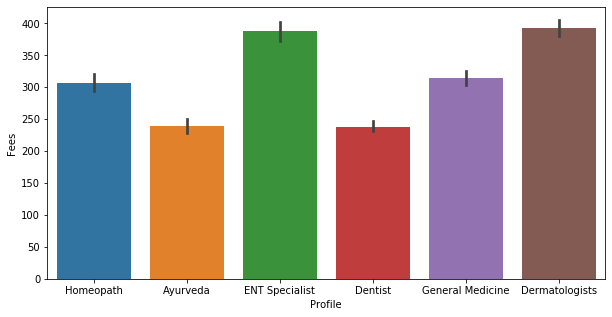

In [35]:
# Analyzing fees by profile
plt.figure(figsize=(10,5))
sns.barplot(x='Profile',y='Fees',data=data)
plt.show()
# ENT specialists and Dermotologists have higher fees

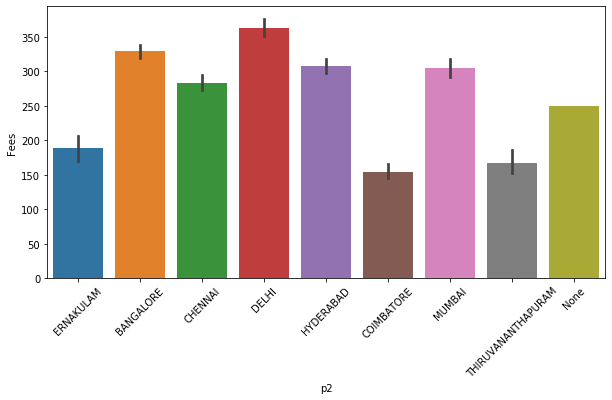

In [36]:
# Analyzing fees by cities
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(x='p2',y='Fees',data=data)
plt.show()
# Fees charged by doctors is highest in Delhi

In [37]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=LabelEncoder().fit_transform(data[col])

In [38]:
data

,Dataset,Experience,Fees,Profile,Rating,p1,p2,q1,q2,q3,q4,q5,q6,q7
0,1,24,100.0,5,100,321,4,8,302,407,225,104,31,13
1,1,12,350.0,0,98,926,0,5,292,407,225,104,31,13
2,1,9,300.0,3,0,492,0,102,396,407,225,104,31,13
3,1,12,250.0,0,0,70,0,14,10,407,225,104,31,13
4,1,20,250.0,0,100,364,1,5,412,407,225,104,31,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,0,10,NaN,0,0,72,0,5,172,407,225,104,31,13
7944,0,4,NaN,2,0,133,1,111,493,316,225,104,31,13
7945,0,9,NaN,4,0,659,1,102,332,407,225,104,31,13
7946,0,12,NaN,1,98,33,0,6,412,407,225,104,31,13


In [39]:
df_train=data.loc[data['Dataset']==1]
df_test=data.loc[data['Dataset']==0]

In [40]:
df_train.drop(columns=['Dataset'], inplace=True)
df_test.drop(columns=['Dataset', 'Fees'], inplace=True)

In [41]:
df_test.reset_index(drop=True,inplace=True)

In [42]:
df_x=df_train.drop(columns=['Fees'])
y=df_train[['Fees']]

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [44]:
x

,Experience,Profile,Rating,p1,p2,q1,q2,q3,q4,q5,q6,q7
0,0.600979,1.543016,1.220669,-0.452398,0.393243,-1.033676,-0.067057,0.356379,0.198296,0.108498,0.054778,0.033029
1,-0.476040,-1.472893,1.178419,1.729863,-1.326583,-1.092688,-0.145621,0.356379,0.198296,0.108498,0.054778,0.033029
2,-0.745295,0.336652,-0.891845,0.164406,-1.326583,0.815368,0.671444,0.356379,0.198296,0.108498,0.054778,0.033029
3,-0.476040,-1.472893,-0.891845,-1.357765,-1.326583,-0.915651,-2.361122,0.356379,0.198296,0.108498,0.054778,0.033029
4,0.241972,-1.472893,1.220669,-0.297295,-0.896627,-1.092688,0.797146,0.356379,0.198296,0.108498,0.054778,0.033029
...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.152221,0.336652,1.178419,-1.350551,-1.326583,0.815368,0.624305,0.356379,0.198296,0.108498,0.054778,0.033029
5957,1.408743,0.939834,-0.891845,0.496254,-0.896627,0.815368,0.797146,0.356379,0.198296,0.108498,0.054778,0.033029
5958,2.126756,0.939834,1.157293,-0.769818,-0.036713,0.815368,0.797146,0.356379,0.198296,0.108498,0.054778,0.033029
5959,-0.206786,0.939834,1.009417,1.664936,1.253157,0.815368,-0.090626,0.356379,0.198296,0.108498,0.054778,0.033029


In [45]:
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.2)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [46]:
# Using Linear regression model
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predicty)))
print('The r2_score is :', r2_score(y_test,predicty))

The mean absolute error for linear regression model is : 142.67085861221415
The mean square error for linear regression model is : 31146.915367846897
The root mean square error for linear regression model is : 176.48488708058517
The r2_score is : 0.09579055960200633


In [47]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(x,y)
gridrr.best_params_

{'alpha': 100}

In [48]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=100)
maxr2score(rr,x,y)

Maximum r2_score is at random state : 125  and it is : 0.13058880740293854


In [49]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  0.09492908469571057
Standard deviation for Ridge regression from mean r2 score is :  0.01128202347605427


In [50]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(x,y)
gridlar.best_params_

{'alpha': 1}

In [51]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=0.01)
maxr2score(lar,x,y)

Maximum r2_score is at random state : 125  and it is : 0.1313593759088595


In [52]:
print("Mean r2 score for Lasso regression after cross validation: ", cross_val_score(lar,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Lasso regression from mean r2 score is : ", cross_val_score(lar,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso regression after cross validation:  0.09480821369301184
Standard deviation for Lasso regression from mean r2 score is :  0.011514435426315662


In [53]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5, n_jobs=-1)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 11}

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=11)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 145  and it is : 0.17282095065307035


In [55]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.10611216642248618
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.01552033148129564


In [56]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2', n_jobs=-1)
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=1)
maxr2score(dtr,x,y)

Maximum r2_score is at random state : 49  and it is : 0.10375102473944187


In [58]:
print("Mean r2 score for Decision Tree Regressor after cross validation: ", cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Decision Tree Regressor from mean r2 score is : ", cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor after cross validation:  0.07520063250090078
Standard deviation for Decision Tree Regressor from mean r2 score is :  0.00860584479938036


In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
hyperparametersrfr={'criterion':['mse','mae'],'max_depth':range(1,10)}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2', n_jobs=-1)
gridrfr.fit(x,y)
print(gridrfr.best_params_)

{'criterion': 'mse', 'max_depth': 7}


In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
maxr2score(rfr,x,y)

Maximum r2_score is at random state : 63  and it is : 0.18292784732166334


In [61]:
print("Mean r2 score for Random Forest Regressor after cross validation: ", cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Random Forest Regressor from mean r2 score is : ", cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Random Forest Regressor after cross validation:  0.09956336927973745
Standard deviation for Random Forest Regressor from mean r2 score is :  0.03082279773115975


In [62]:
# Among all the models, KNN Regressor is the best performing model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 145,test_size=0.20)
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
predictknry=knr.predict(x_test)
print('The mean absolute error for KNeighborsRegressor model is :', mean_absolute_error(y_test, predictknry))
print('The mean square error for KNeighborsRegressor model is :', mean_squared_error(y_test, predictknry))
print('The root mean square error for KNeighborsRegressor model is :', np.sqrt(mean_squared_error(y_test, predictknry)))
print("The r2_score for KNeighborsRegressor is: ",r2_score(y_test,predictknry))

The mean absolute error for KNeighborsRegressor model is : 143.24107292539816
The mean square error for KNeighborsRegressor model is : 34723.17783738474
The root mean square error for KNeighborsRegressor model is : 186.34156229189648
The r2_score for KNeighborsRegressor is:  0.08553595262047997


In [63]:
price_pred=knr.predict(df_test)
price_pred

array([[280.],
       [280.],
       [220.],
       ...,
       [380.],
       [290.],
       [354.]])

In [66]:
# Price_pred dataframe
price_prediction=pd.DataFrame(price_pred,columns=["Fees"])

In [67]:
price_prediction.to_csv("Doctors_Fees_Predictions.csv",index=False)